# 2.For global superstore data study sales, profit and costs based on continents, categories, subcategories using clustering and PCA. Do you see distinct patterns?

# IMPORTING LIBRARIES

In [1]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

# LOADING DATASET

In [3]:
df=pd.read_csv('C:\\Users\\sowndariya\\Desktop\\Prasath sir\\Datasets\\global_superstore_2018.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Product Name,Sub-Category,Category,Sales,Quantity,Discount,Profit,Margin,Shipping Cost,Order Priority
0,24599,IN-2017-CA120551-42816,22-03-17,29-03-17,Standard Class,CA-120551,Cathy Armstrong,Home Office,NaN,Herat,...,"Ikea Library with Doors, Mobile",Bookcases,Furniture,731.82,2,0.0,102.42,14.00%,39.66,Medium
1,29465,ID-2015-BD116051-42248,01-09-15,04-09-15,Second Class,BD-116051,Brian Dahlen,Consumer,NaN,Herat,...,"Acme Scissors, Easy Grip",Supplies,Office Supplies,243.54,9,0.0,104.49,42.90%,18.72,Medium
2,24598,IN-2017-CA120551-42816,22-03-17,29-03-17,Standard Class,CA-120551,Cathy Armstrong,Home Office,NaN,Herat,...,"Epson Receipt Printer, White",Machines,Technology,346.32,3,0.0,13.77,3.98%,14.10,Medium
3,24597,IN-2017-CA120551-42816,22-03-17,29-03-17,Standard Class,CA-120551,Cathy Armstrong,Home Office,NaN,Herat,...,"Rubbermaid Door Stop, Erganomic",Furnishings,Furniture,169.68,4,0.0,79.68,46.96%,11.01,Medium
4,29464,ID-2015-BD116051-42248,01-09-15,04-09-15,Second Class,BD-116051,Brian Dahlen,Consumer,NaN,Herat,...,"Cameo Interoffice Envelope, with clear poly wi...",Envelopes,Office Supplies,203.88,4,0.0,24.36,11.95%,5.72,Medium


# EXPLORATORY DATA ANALYSIS

In [4]:
pd.set_option('max_rows',60000)
pd.set_option('max_columns',25)

In [5]:
df.shape

(51290, 25)

In [6]:
df['Segment'].unique()

array(['Home Office', 'Consumer', 'Corporate'], dtype=object)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   Postal Code     9994 non-null   float64
 9   City            51290 non-null  object 
 10  State           51290 non-null  object 
 11  Country         51290 non-null  object 
 12  Region          51290 non-null  object 
 13  Market          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Product Name    51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Category        51290 non-null 

In [8]:
df.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
Postal Code       41296
City                  0
State                 0
Country               0
Region                0
Market                0
Product ID            0
Product Name          0
Sub-Category          0
Category              0
Sales                 0
Quantity              0
Discount              0
Profit                0
Margin                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [9]:
df.nunique()

Row ID            51290
Order ID          25728
Order Date         1429
Ship Date          1463
Ship Mode             4
Customer ID       17415
Customer Name       796
Segment               3
Postal Code         631
City               3650
State              1106
Country             165
Region               23
Market                5
Product ID         3788
Product Name       3788
Sub-Category         17
Category              3
Sales             22995
Quantity             14
Discount             27
Profit            24575
Margin             5942
Shipping Cost     16452
Order Priority        4
dtype: int64

In [10]:
df.dtypes

Row ID              int64
Order ID           object
Order Date         object
Ship Date          object
Ship Mode          object
Customer ID        object
Customer Name      object
Segment            object
Postal Code       float64
City               object
State              object
Country            object
Region             object
Market             object
Product ID         object
Product Name       object
Sub-Category       object
Category           object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Margin             object
Shipping Cost     float64
Order Priority     object
dtype: object

In [11]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Postal Code', 'City',
       'State', 'Country', 'Region', 'Market', 'Product ID', 'Product Name',
       'Sub-Category', 'Category', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Margin', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [12]:
df.drop(['Row ID','Order ID','Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name','Order Priority','Postal Code','Product ID', 'Product Name',
         'Quantity', 'Discount','Margin','Segment', 'City', 'State', 'Country',],axis=1,inplace=True)


In [13]:
df.columns

Index(['Region', 'Market', 'Sub-Category', 'Category', 'Sales', 'Profit',
       'Shipping Cost'],
      dtype='object')

In [14]:
df.dtypes

Region            object
Market            object
Sub-Category      object
Category          object
Sales            float64
Profit           float64
Shipping Cost    float64
dtype: object

In [15]:
df.columns

Index(['Region', 'Market', 'Sub-Category', 'Category', 'Sales', 'Profit',
       'Shipping Cost'],
      dtype='object')

# CLUSTERING DATA USING PANDAS- GROUPBY

# MARKET Vs SALES,PROFIT,COST

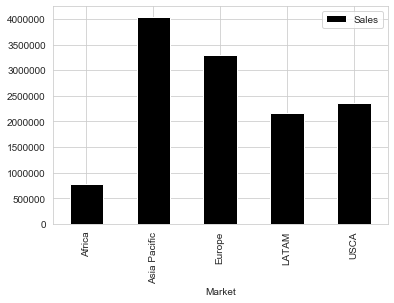

In [16]:
sns.set_style('whitegrid')
df.groupby('Market')[['Sales']].sum().plot.bar(color='k')

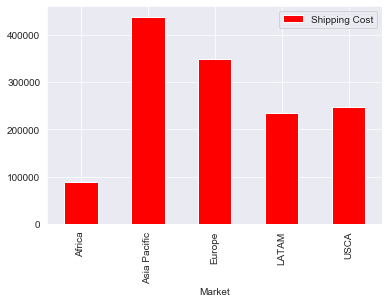

In [17]:
sns.set_style('darkgrid')
df.groupby('Market')[['Shipping Cost']].sum().plot.bar(color='r')

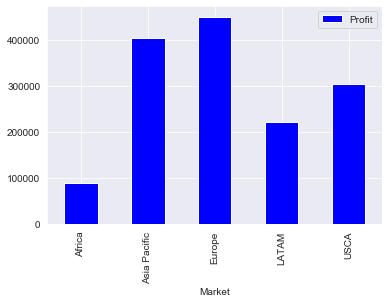

In [18]:
sns.set_style('darkgrid')
df.groupby('Market')[['Profit']].sum().plot.bar(color='b')

                    Profit         Sales  Shipping Cost
Market                                                 
Africa         88871.63100  7.837732e+05     88839.4700
Asia Pacific  403176.03800  4.042658e+06    437858.1640
Europe        449551.72350  3.287336e+06    348905.0340
LATAM         221643.48708  2.164605e+06    235025.6150
USCA          304214.41170  2.364129e+06    247457.4204


Text(0.5, 0, 'Market')

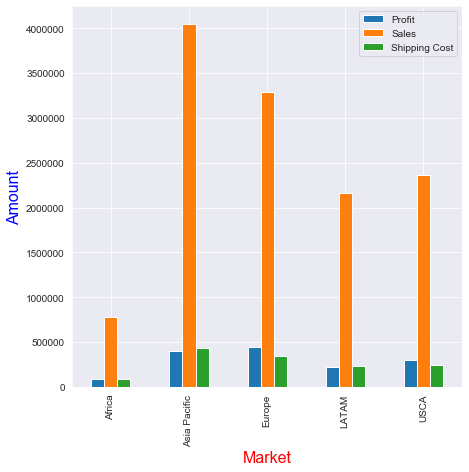

In [19]:
sns.set_style('darkgrid')
print(df.groupby('Market')[['Profit','Sales','Shipping Cost']].sum())
df.groupby('Market')[['Profit','Sales','Shipping Cost']].sum().plot.bar(figsize=(7,7))
plt.ylabel('Amount',fontsize=16,color='b')
plt.xlabel('Market',fontsize=16,color='r')

# SUB-CATEGORY Vs SALES,PROFIT,COST

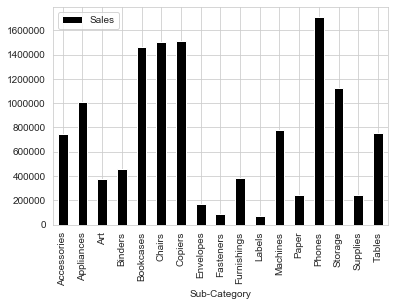

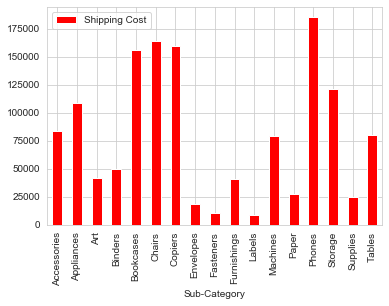

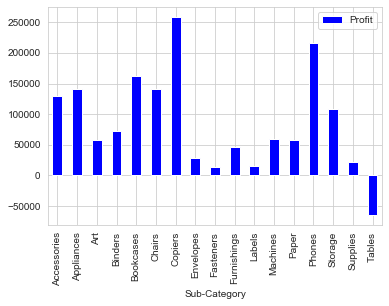

In [20]:
sns.set_style('whitegrid')
df.groupby('Sub-Category')[['Sales']].sum().plot.bar(color='k')
df.groupby('Sub-Category')[['Shipping Cost']].sum().plot.bar(color='r')
df.groupby('Sub-Category')[['Profit']].sum().plot.bar(color='b')

                    Profit         Sales  Shipping Cost
Sub-Category                                           
Accessories   129626.30620  7.492370e+05     83592.3340
Appliances    141562.58770  1.010536e+06    108307.7460
Art            57829.85930  3.716132e+05     41889.0820
Binders        72433.15160  4.618694e+05     49773.1020
Bookcases     161924.41950  1.466572e+06    155487.9670
Chairs        140396.26750  1.501682e+06    164253.3520
Copiers       258567.54818  1.509436e+06    159501.2049
Envelopes      28849.48730  1.692175e+05     18582.9680
Fasteners      13844.28890  8.949505e+04     10300.0680
Furnishings    46845.43190  3.851560e+05     40981.6560
Labels         14988.92370  7.335028e+04      8840.7250
Machines       58867.87300  7.790601e+05     79149.8485
Paper          58111.65350  2.417875e+05     26864.0850
Phones        216717.00580  1.706824e+06    184953.4920
Storage       108416.68060  1.126813e+06    120793.8520
Supplies       22559.19530  2.428111e+05     249

Text(0.5, 0, 'Sub Categories')

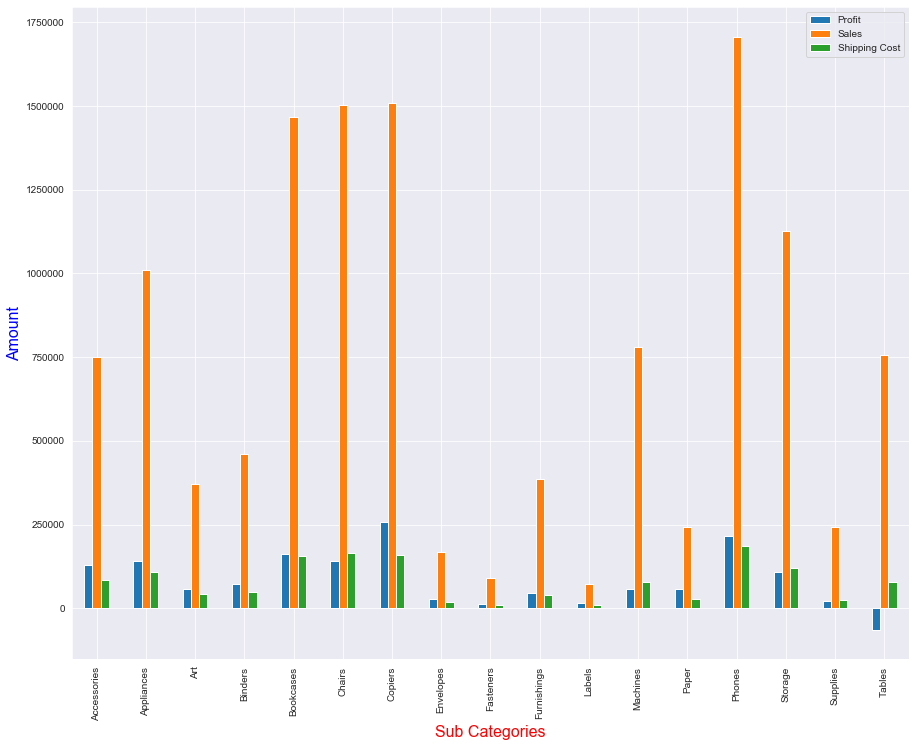

In [21]:
sns.set_style('darkgrid')
print(df.groupby('Sub-Category')[['Profit','Sales','Shipping Cost']].sum())
df.groupby('Sub-Category')[['Profit','Sales','Shipping Cost']].sum().plot.bar(figsize=(15,12))
plt.ylabel('Amount',fontsize=16,color='b')
plt.xlabel('Sub Categories',fontsize=16,color='r')

# CATEGORY Vs SALES,PROFIT,COST

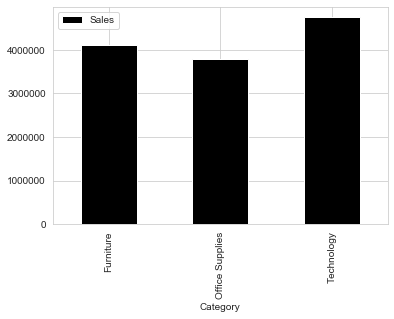

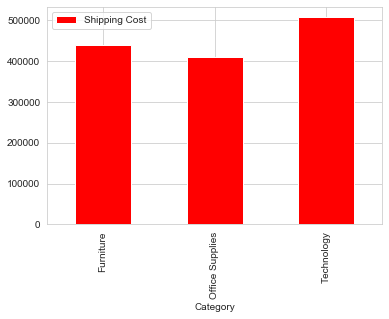

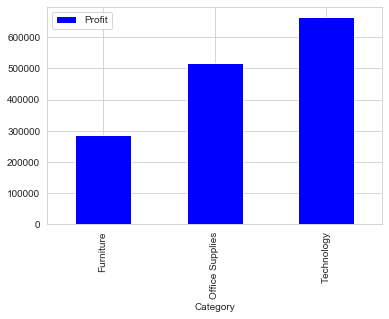

In [22]:
sns.set_style('whitegrid')
df.groupby('Category')[['Sales']].sum().plot.bar(color='k')
df.groupby('Category')[['Shipping Cost']].sum().plot.bar(color='r')
df.groupby('Category')[['Profit']].sum().plot.bar(color='b')

                       Profit         Sales  Shipping Cost
Category                                                  
Furniture        285082.73020  4.110452e+06    440586.3690
Office Supplies  518595.82790  3.787493e+06    410302.4550
Technology       663778.73318  4.744557e+06    507196.8794


Text(0.5, 0, 'Categories')

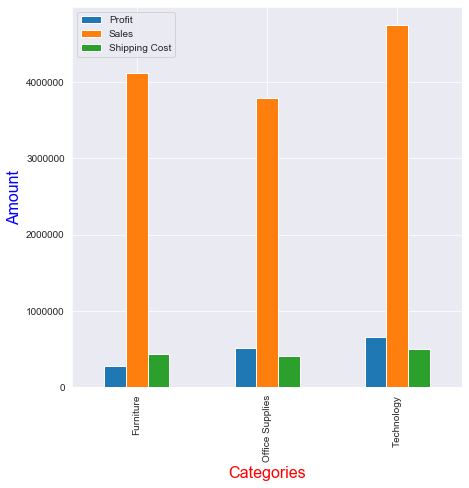

In [23]:
sns.set_style('darkgrid')
print(df.groupby('Category')[['Profit','Sales','Shipping Cost']].sum())
df.groupby('Category')[['Profit','Sales','Shipping Cost']].sum().plot.bar(figsize=(7,7))
plt.ylabel('Amount',fontsize=16,color='b')
plt.xlabel('Categories',fontsize=16,color='r')

# CLUSTERS OF MARKET

In [24]:
df['Market'].unique()

array(['Asia Pacific', 'Europe', 'Africa', 'LATAM', 'USCA'], dtype=object)

In [25]:
Asia=df[df.Market=='Asia Pacific']
Europe=df[df.Market=='Europe']
Africa=df[df.Market=='Africa']
LATAM=df[df.Market=='LATAM']
USCA=df[df.Market=='USCA']


In [26]:
d=[Asia, Europe, Africa, LATAM, USCA]
for i in d:
    print(i.shape)
print(df['Market'].value_counts())

(14302, 7)
(11729, 7)
(4587, 7)
(10294, 7)
(10378, 7)
Asia Pacific    14302
Europe          11729
USCA            10378
LATAM           10294
Africa           4587
Name: Market, dtype: int64


# CLUSTERS OF SUB-CATEGORY

In [27]:
df['Sub-Category'].unique()

array(['Bookcases', 'Supplies', 'Machines', 'Furnishings', 'Envelopes',
       'Tables', 'Chairs', 'Phones', 'Appliances', 'Copiers', 'Storage',
       'Paper', 'Accessories', 'Art', 'Binders', 'Labels', 'Fasteners'],
      dtype=object)

In [28]:
bookcase=df[df['Sub-Category']=='Bookcases']
supplies=df[df['Sub-Category']=='Supplies']
Machines=df[df['Sub-Category']=='Machines']
furnishing=df[df['Sub-Category']=='Furnishings']
envelopes=df[df['Sub-Category']=='Envelopes']
Tables=df[df['Sub-Category']=='Tables']
chairs=df[df['Sub-Category']=='Chairs']
phones=df[df['Sub-Category']=='Phones']
appliances=df[df['Sub-Category']=='Appliances']
copiers=df[df['Sub-Category']=='Copiers']
storage=df[df['Sub-Category']=='Storage']
paper=df[df['Sub-Category']=='Paper']
accessories=df[df['Sub-Category']=='Accessories']
art=df[df['Sub-Category']=='Art']
binders=df[df['Sub-Category']=='Binders']
labels=df[df['Sub-Category']=='Labels']
fasteners=df[df['Sub-Category']=='Fasteners']

In [29]:
sub_cat=[bookcase, supplies, Machines, furnishing, envelopes,
       Tables, chairs, phones, appliances, copiers, storage,
       paper, accessories, art, binders, labels, fasteners]
for i in sub_cat:
    print(i.shape)
print(df['Sub-Category'].value_counts())

(2411, 7)
(2407, 7)
(1486, 7)
(3154, 7)
(2387, 7)
(861, 7)
(3434, 7)
(3357, 7)
(1742, 7)
(2223, 7)
(5049, 7)
(3492, 7)
(3075, 7)
(4864, 7)
(6146, 7)
(2601, 7)
(2601, 7)
Binders        6146
Storage        5049
Art            4864
Paper          3492
Chairs         3434
Phones         3357
Furnishings    3154
Accessories    3075
Labels         2601
Fasteners      2601
Bookcases      2411
Supplies       2407
Envelopes      2387
Copiers        2223
Appliances     1742
Machines       1486
Tables          861
Name: Sub-Category, dtype: int64


# CLUSTERS OF CATEGORY

In [30]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [31]:
Furniture=df[df['Category']=='Furniture']
Office=df[df['Category']=='Office Supplies']
Tech=df[df['Category']=='Technology']

In [32]:
listt=[Furniture,Office,Tech]
for i in listt:
    print(i.shape)
print(df['Category'].value_counts())
    

(9860, 7)
(31289, 7)
(10141, 7)
Office Supplies    31289
Technology         10141
Furniture           9860
Name: Category, dtype: int64


In [33]:
df.drop(['Region'],axis=1,inplace=True)

In [34]:
df.columns

Index(['Market', 'Sub-Category', 'Category', 'Sales', 'Profit',
       'Shipping Cost'],
      dtype='object')

# K-MEANS

## DUMMY CODING

In [35]:
categorical=[col for col in df.columns.values if df[col].dtype=='object']
df_cat=df[categorical]
df_num=df.drop(df_cat,axis=1)
df_cat=pd.get_dummies(df_cat,drop_first=True)
data=pd.concat([df_num,df_cat],axis=1)
data.columns

Index(['Sales', 'Profit', 'Shipping Cost', 'Market_Asia Pacific',
       'Market_Europe', 'Market_LATAM', 'Market_USCA',
       'Sub-Category_Appliances', 'Sub-Category_Art', 'Sub-Category_Binders',
       'Sub-Category_Bookcases', 'Sub-Category_Chairs', 'Sub-Category_Copiers',
       'Sub-Category_Envelopes', 'Sub-Category_Fasteners',
       'Sub-Category_Furnishings', 'Sub-Category_Labels',
       'Sub-Category_Machines', 'Sub-Category_Paper', 'Sub-Category_Phones',
       'Sub-Category_Storage', 'Sub-Category_Supplies', 'Sub-Category_Tables',
       'Category_Office Supplies', 'Category_Technology'],
      dtype='object')

# ELBOW METHOD

In [36]:
from sklearn.cluster import KMeans
km=KMeans(3)
km.fit(data)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Text(0, 0.5, 'WCSS')

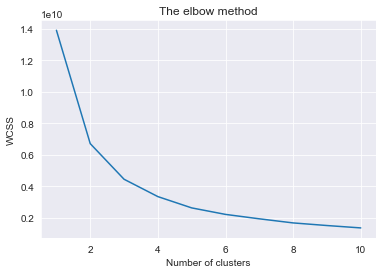

In [37]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init= 'k-means++', random_state=1)
  kmeans.fit(data)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')


Text(0, 0.5, 'WCSS')

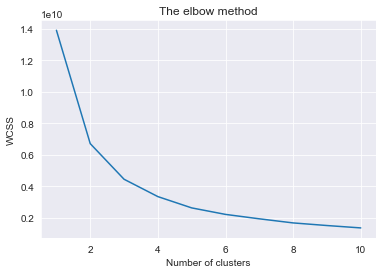

In [38]:
km=KMeans(5)
km.fit(data)
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init= 'k-means++', random_state=1)
  kmeans.fit(data)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

# SILHOUTTE METHOD

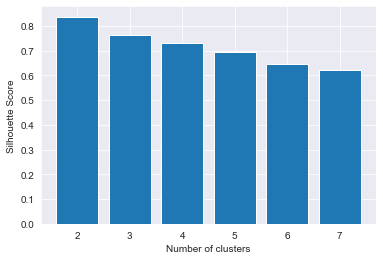

In [39]:
from sklearn.metrics import silhouette_score
silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(data, KMeans(n_clusters = n_cluster).fit_predict(data))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

# PCA

In [40]:
from sklearn.decomposition import PCA

pca = PCA()
dd=pca.fit_transform(data)
dd


array([[ 4.89794066e+02,  1.78925580e+01,  3.07894294e+01, ...,
        -1.33689263e-02,  3.03600022e-15,  9.60398825e-15],
       [ 1.06268340e+01, -7.52850893e+01,  6.76475501e+00, ...,
         1.94266227e-04,  4.28085115e-16,  5.16345487e-16],
       [ 9.37930709e+01,  3.27783675e+01,  2.16306801e+01, ...,
        -2.51695682e-01, -5.54269209e-17,  2.91057682e-15],
       ...,
       [-2.42832617e+02, -7.95509018e+00,  3.32192485e+00, ...,
         1.52871758e-02,  2.37554260e-17, -7.73512439e-18],
       [-1.78644701e+02,  1.72132380e+02,  7.72151968e+00, ...,
        -2.33540445e-01,  7.89301975e-18,  1.23514068e-18],
       [-2.46359256e+02, -1.24196435e+01,  3.26297858e+00, ...,
         1.74593801e-02,  6.61788605e-19, -5.94556256e-17]])

In [41]:
PCA_components = pd.DataFrame(dd)
PCA_component

NameError: name 'PCA_component' is not defined

In [ ]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

# KMEANS WITH PCA

In [ ]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

# HENCE, THE NUMBER OF CLUSTERS FOR GIVEN DATASET IS 5.

In [ ]:
# FOR MARKET ALONE clustering

In [ ]:
df1=df.drop(['Sub-Category','Category','Region'],axis=1)
df1.head()

In [ ]:
# Import label encoder 
from sklearn import preprocessing 

label_encoder = preprocessing.LabelEncoder() 

df1['Market']= label_encoder.fit_transform(df1['Market']) 

df1['Market'].unique() 


In [ ]:
#STANDARADIZATION
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
dff=std.fit_transform(df1)
dff



In [ ]:
from sklearn.cluster import KMeans
km=KMeans(5)
km.fit(dff)
df1['Group']=km.fit_predict(dff)

In [ ]:
df1['Group'].unique()

In [ ]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init= 'k-means++', random_state=1)
  kmeans.fit(df1)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [ ]:
df1['Group'].value_counts()

In [ ]:
grp0=df1[df1['Group']==0]
grp1=df1[df1['Group']==1]
grp2=df1[df1['Group']==2]
grp3=df1[df1['Group']==3]
grp4=df1[df1['Group']==4]


In [ ]:
# DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=0.7)
db.fit(dff)

In [ ]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [ ]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [ ]:
n_clusters_

In [ ]:
n_noise_